# Step 4: Pneumonia Detection from Chest X-Rays
This notebook builds and trains a CNN to classify chest X-ray images as either normal or pneumonia.

## 1. Load and Preprocess the Data

In [1]:

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set paths
base_dir = '../chest_xray'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Image generators
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, shear_range=0.2, horizontal_flip=True)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), color_mode='grayscale', class_mode='binary', batch_size=32)
val_gen = val_test_datagen.flow_from_directory(val_dir, target_size=(150, 150), color_mode='grayscale', class_mode='binary', batch_size=32)
test_gen = val_test_datagen.flow_from_directory(test_dir, target_size=(150, 150), color_mode='grayscale', class_mode='binary', batch_size=32, shuffle=False)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## 2. Build the CNN Model

In [2]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\natha\anaconda3\envs\ARN\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,827,905 (18.42 MB)

 Trainable params: 4,827,905 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

## 3. Train the Model

In [3]:

history = model.fit(train_gen, epochs=10, validation_data=val_gen)


C:\Users\natha\anaconda3\envs\ARN\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.7942 - loss: 0.5107 - val_accuracy: 0.7500 - val_loss: 0.6525
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 128s 784ms/step - accuracy: 0.8955 - loss: 0.2484 - val_accuracy: 0.7500 - val_loss: 0.6982
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 127s 779ms/step - accuracy: 0.9188 - loss: 0.1955 - val_accuracy: 0.8125 - val_loss: 0.3917
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 136s 831ms/step - accuracy: 0.9246 - loss: 0.1983 - val_accuracy: 0.6250 - val_loss: 0.9275
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 123s 750ms/step - accuracy: 0.9336 - loss: 0.1651 - val_accuracy: 0.6250 - val_loss: 0.6588
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 131s 803ms/step - accuracy: 0.9434 - loss: 0.1463 - val_accuracy: 0.7500 - val_loss: 0.3709
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 136s 830ms/step - accuracy: 0.9440 - loss: 0.1471 - val_accuracy: 0.5625 - val_loss: 1.2853
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 123s 753ms/step - accuracy: 0.9431 - lo

## 4. Evaluate on Test Set

In [4]:

loss, acc = model.evaluate(test_gen)
print(f"Test Accuracy: {acc*100:.2f}%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7159 - loss: 0.9517
Test Accuracy: 83.81%


## 5. Confusion Matrix and F1-Score

20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 386ms/step


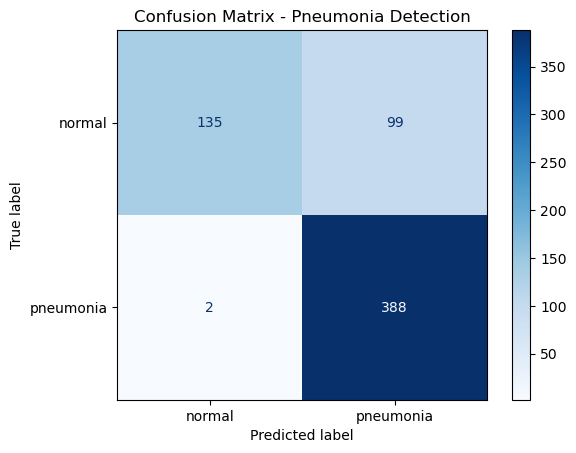

              precision    recall  f1-score   support

      normal       0.99      0.58      0.73       234
   pneumonia       0.80      0.99      0.88       390

    accuracy                           0.84       624
   macro avg       0.89      0.79      0.81       624
weighted avg       0.87      0.84      0.83       624



In [5]:

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

y_pred = model.predict(test_gen)
y_pred_bin = (y_pred > 0.5).astype(int)
y_true = test_gen.classes

cm = confusion_matrix(y_true, y_pred_bin)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen.class_indices)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Pneumonia Detection")
plt.show()

print(classification_report(y_true, y_pred_bin, target_names=test_gen.class_indices.keys()))
